In [1]:
from reinforcement_training import *
from notebook_game_helper import *

Using Theano backend.


In [12]:
training_game_size_x = 40
training_game_size_y = 30

layers = 2
neurons = 20
layer = {"size":neurons,"activation":"tanh"}
hiddens = [layer for i in range(layers)]    # make an optimizer
# from keras.optimizers import sgd, RMSprop, Adagrad, Adadelta, Adam
# # note to self: DON'T CHANGE THIS UNTIL YOU KNOW WE'RE LEARNING SOMETHING
# # optimizer = sgd(lr = 0.0001)
# # optimizer_str = "SGD"
# # optimizer = Adagrad()
# # optimizer_str = "Adagrad"
# # optimizer = RMSprop()
# # optimizer_str = "RMSprop"
# # optimizer = Adadelta()
# # optimizer_str = "Adadelta"
optimizer = Adam(lr = 0.000001)
optimizer_str = "Adam"
# model = baseline_model(ipt_mode = 0, optimizer = optimizer, layers = hiddens)
# # prepare the game for training model
# training_game = ReinforcementNaviGame(training_game_size_y,
#                                 training_game_size_x,
#                                 model,
#                                 tolerance = 10)
# training_game.setup()

In [4]:
from keras.models import load_model
model = load_model("mlp_ipt_20d_20d_out.h5")

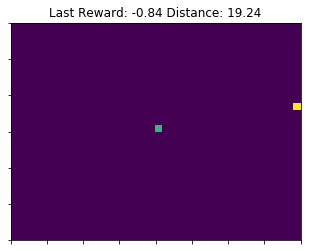

None

In [22]:
animate_game(training_game, 100, save = True)

In [23]:
from os import listdir
from os.path import isfile, join
mypath = "images/"
filenames = [f for f in listdir(mypath) if isfile(join(mypath, f))]

import imageio
images = []
for filename in filenames[1:]:
    images.append(imageio.imread(filename))
imageio.mimsave('RL_after_12_rounds.gif', images)

In [16]:
training_game.Navigator.move(x = 0, y = 0)

In [35]:
training_game_2 = ReinforcementNaviGame(training_game_size_y,
                                training_game_size_x,
                                model,
                                tolerance = 5)
training_game_2.setup()

In [25]:
training_episodes = 250000
steps = 10

output = train_model(game = training_game,
                model = model,
                episodes = training_episodes,
                steps = steps)

Network training starting:   0%|          | 0/250000 [00:00<?, ?it/s]

ValueError: cannot reshape array of size 5 into shape (1,6)

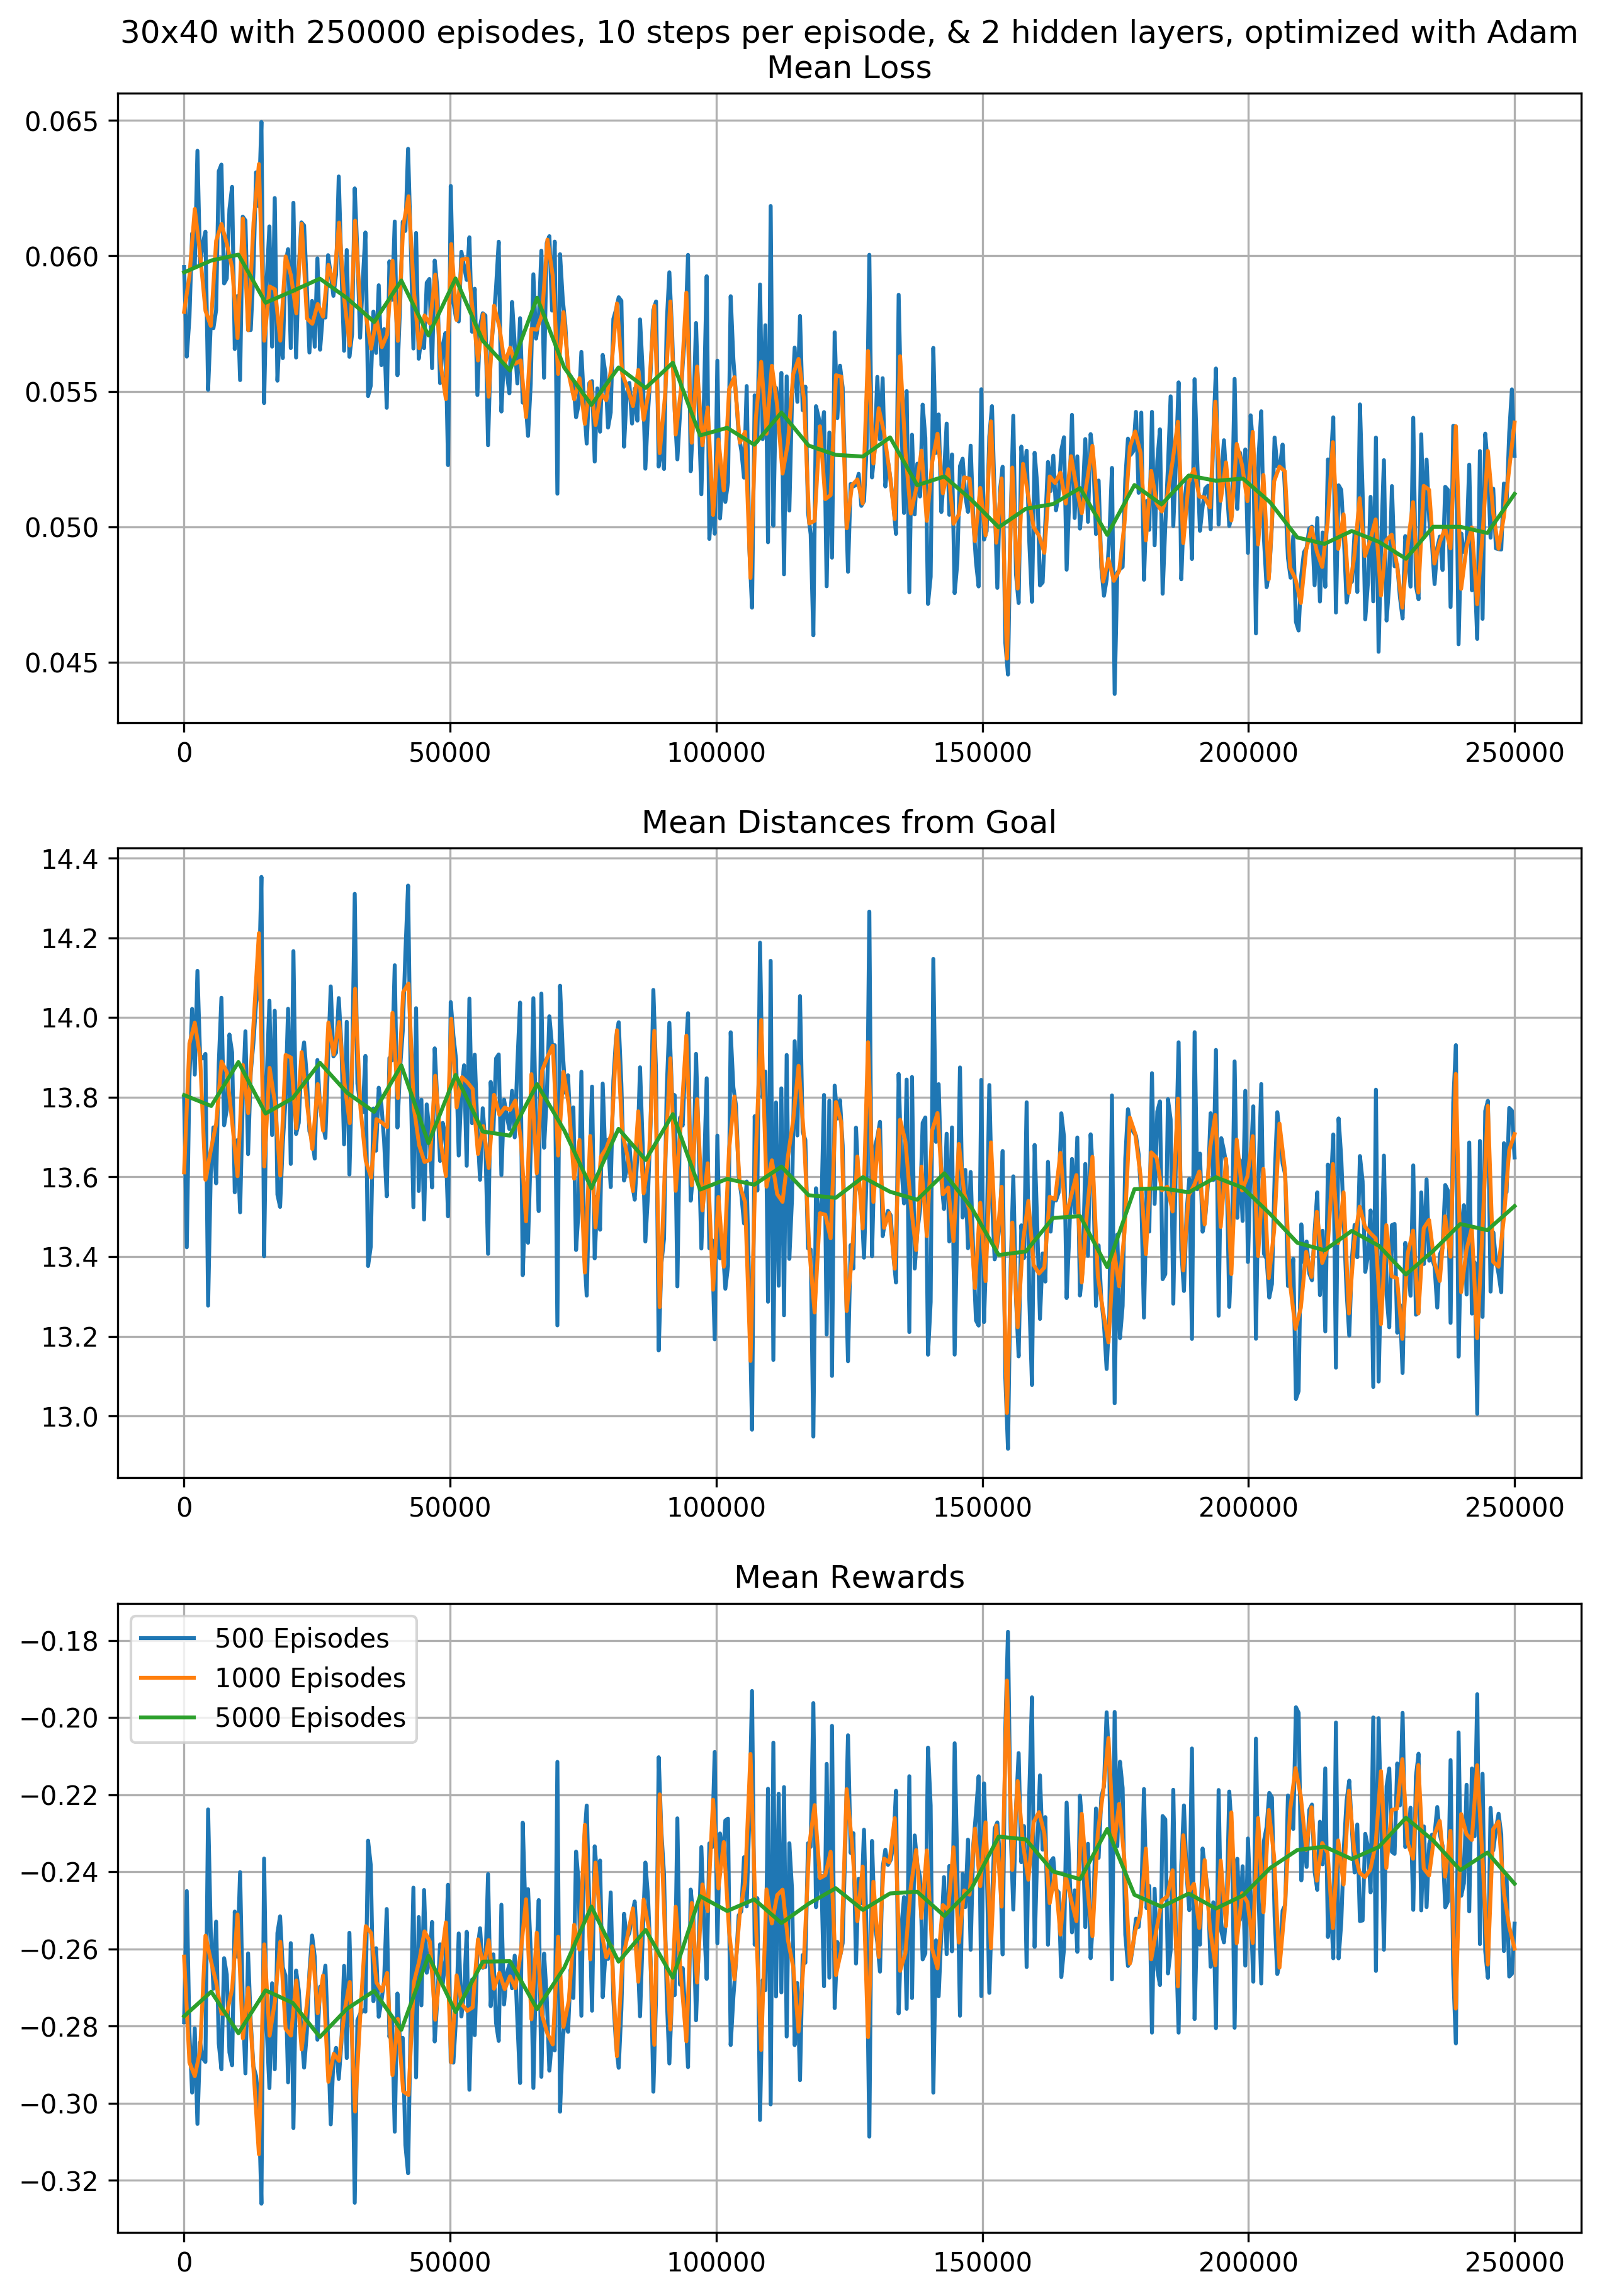

In [19]:
# plot learning info
title_str = str(training_game_size_y) + "x" + str(training_game_size_x) + " with "
title_str += str(training_episodes) + " episodes, " + str(steps) + " steps per episode, & "
title_str += str(len(hiddens)) + " hidden layers, optimized with " + optimizer_str + "\n"
f, axarr = pl.subplots(3, 1, figsize = (10, 15), dpi = 300)
# f.canvas.set_window_title("RL Loss, 100 eps w/ 50 steps, Look: 20")
mean_step = 10
num_means = int(len(output['distances'])/mean_step/steps)

for _, k in enumerate([500, 1000, 5000]):
    mean_step = k
    mean_rewards = []
    mean_dists = []
    mean_loss = []
    num_means = int(len(output['distances'])/mean_step/steps)
    steps_per_mean = steps*mean_step
    x = np.linspace(0, training_episodes, num_means)
    for i in range(num_means):
        mean_r = 0
        mean_d = 0
        mean_l = 0
        for j in range(steps_per_mean):
            mean_r += output['rewards'][j + i * steps_per_mean]
            mean_d += output['distances'][j + i * steps_per_mean]
            mean_l += output['loss'][j + i * steps_per_mean]
        mean_r = mean_r / steps_per_mean
        mean_d = mean_d / steps_per_mean
        mean_l = mean_l / steps_per_mean
        mean_rewards.append(mean_r)
        mean_dists.append(mean_d)
        mean_loss.append(mean_l)
    label = str(mean_step) + " Episodes"
    axarr[0].plot(x, mean_loss, label = label)
    axarr[1].plot(x, mean_dists, label = label)
    axarr[2].plot(x, mean_rewards, label = label)

axarr[0].grid(True)
axarr[0].set_title(title_str + 'Mean Loss')
axarr[1].grid(True)
axarr[1].set_title('Mean Distances from Goal')
axarr[2].grid(True)
axarr[2].set_title('Mean Rewards')
f.subplots_adjust(hspace=0.2)

file_str = str(training_game_size_y) + "x" + str(training_game_size_x) + "_"
file_str += str(training_episodes) + "_" + str(steps) + "_" + str(len(hiddens))
file_str += "_" + str(neurons) + "_neurons_"+ optimizer_str
pl.legend()
pl.plot()
pl.savefig("rl_plots" + file_str + "13.png")
pl.show()

In [24]:
model.save("mlp_ipt_20d_20d_out.h5")